### model 9 - Adding Image Augmentation with Learning Rate

#### Target:
1. Inorder to increase the accuracy, Learning rate and Image augmentation can be added

#### Results:
Total parameters: 7,598
Best Training Accuracy - 99.08 at the 15th Epoch
Best Testing Accuracy - 99.08 from the 12th epoch

#### Analysis:
1. transforms.RandomAffine(degrees=15) is added as additional augmentation. Introducing this variation in the dataset has improved the test accuracy
2. By adding ReduceLRonPlateau helps the model converge more effieciently to reach a better optima
3. Adding these 2 have increased the model accuracy and more consistent results

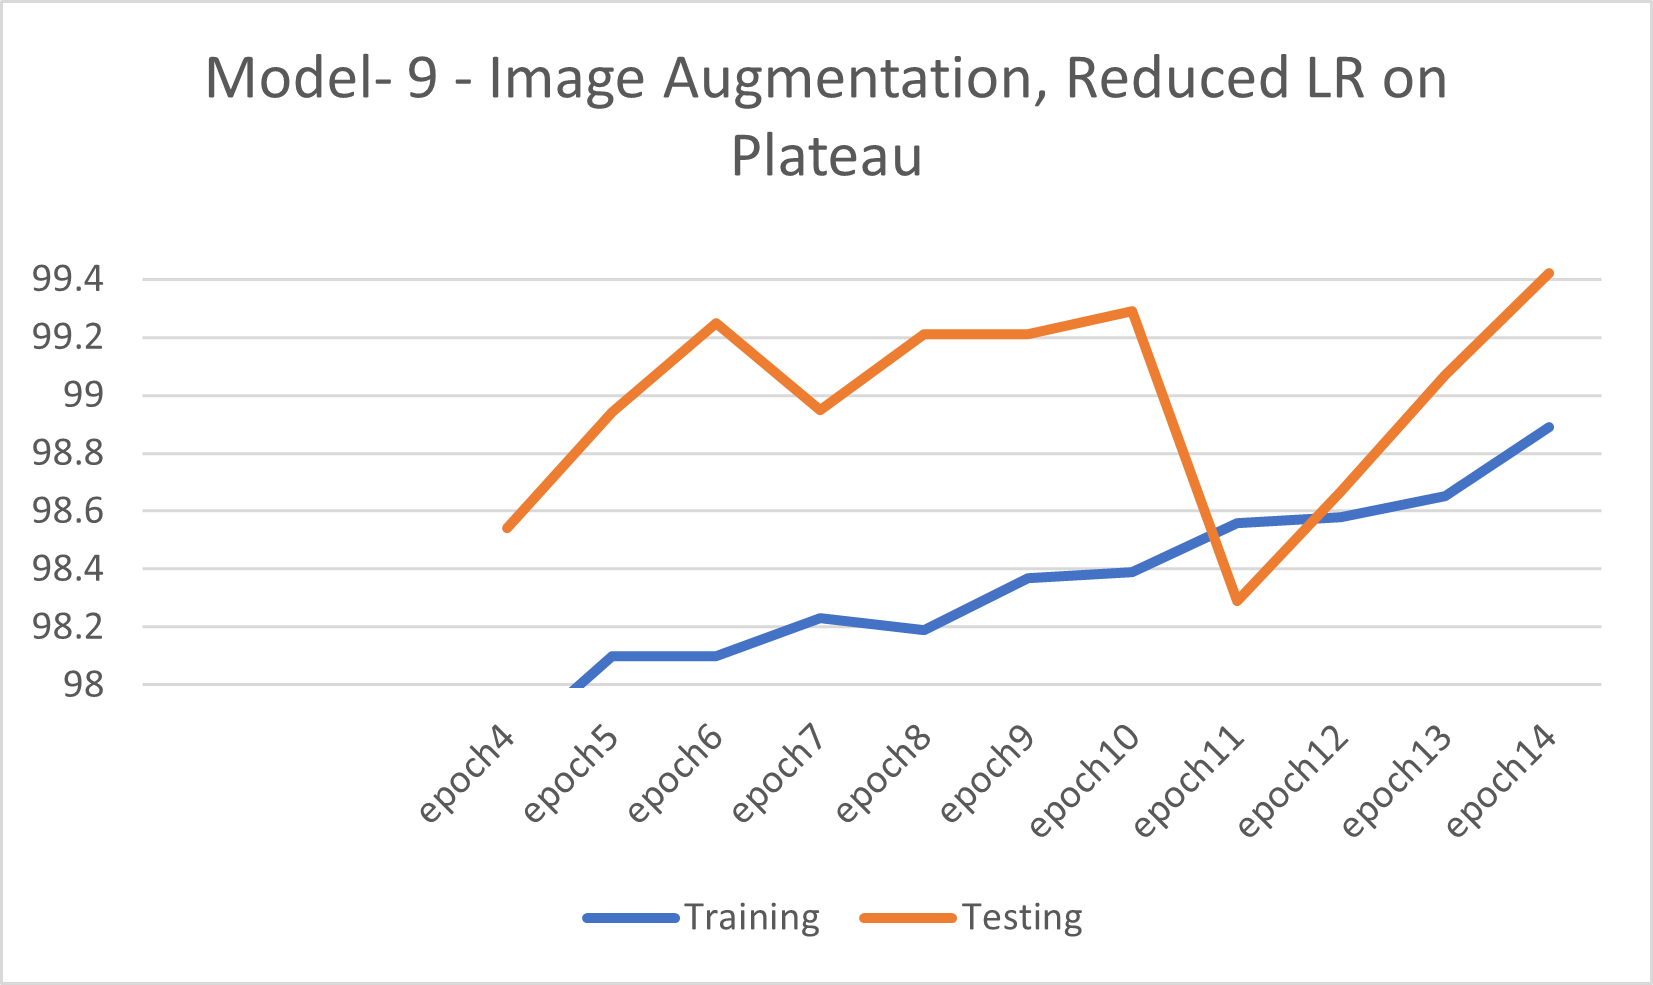

## Import Libraries

In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model7

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train Phase transformations
train_transformer = [transforms.RandomRotation((-6.9, 6.9), fill=(1,)),transforms.RandomAffine(degrees=15),
                    transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       ]

# Test Phase transformations
test_transformer = [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]


# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


100%|██████████| 9912422/9912422 [00:00<00:00, 301568282.34it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 85126980.90it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 105048855.42it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21574777.77it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [3]:
# sending model to device
model = model7().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,080
       BatchNorm2d-6           [-1, 12, 28, 28]              24
              ReLU-7           [-1, 12, 28, 28]               0
           Dropout-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             120
             ReLU-11           [-1, 10, 14, 14]               0
           Conv2d-12           [-1, 16, 12, 12]           1,440
      BatchNorm2d-13           [-1, 16, 12, 12]              32
             ReLU-14           [-1, 16,

# Let's Train and test our model

In [4]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
model =  model7().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.075, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, verbose=True)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    val_loss = models.test_losses[-1]  # Get the validation loss from the test_losses list
    scheduler.step(val_loss)

EPOCH: 1


Loss=0.0726897194981575 Batch_id=468 Accuracy=89.14: 100%|██████████| 469/469 [00:25<00:00, 18.68it/s]



Test set: Average loss: 0.0730, Accuracy: 9784/10000 (97.84%)

EPOCH: 2


Loss=0.05751657858490944 Batch_id=468 Accuracy=97.30: 100%|██████████| 469/469 [00:25<00:00, 18.10it/s]



Test set: Average loss: 0.0568, Accuracy: 9828/10000 (98.28%)

EPOCH: 3


Loss=0.02527661807835102 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:26<00:00, 17.37it/s]



Test set: Average loss: 0.0478, Accuracy: 9854/10000 (98.54%)

EPOCH: 4


Loss=0.025234775617718697 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:25<00:00, 18.30it/s]



Test set: Average loss: 0.0344, Accuracy: 9894/10000 (98.94%)

EPOCH: 5


Loss=0.03964553773403168 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:25<00:00, 18.34it/s]



Test set: Average loss: 0.0269, Accuracy: 9925/10000 (99.25%)

EPOCH: 6


Loss=0.03246978670358658 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:25<00:00, 18.55it/s]



Test set: Average loss: 0.0351, Accuracy: 9895/10000 (98.95%)

EPOCH: 7


Loss=0.008243152871727943 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:25<00:00, 18.64it/s]



Test set: Average loss: 0.0248, Accuracy: 9921/10000 (99.21%)

EPOCH: 8


Loss=0.08272963017225266 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:25<00:00, 18.54it/s]



Test set: Average loss: 0.0250, Accuracy: 9921/10000 (99.21%)

EPOCH: 9


Loss=0.03633847087621689 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:25<00:00, 18.63it/s]



Test set: Average loss: 0.0226, Accuracy: 9929/10000 (99.29%)

EPOCH: 10


Loss=0.01883416436612606 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:25<00:00, 18.64it/s]



Test set: Average loss: 0.0432, Accuracy: 9867/10000 (98.67%)

EPOCH: 11


Loss=0.01683684252202511 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:24<00:00, 18.78it/s]



Test set: Average loss: 0.0275, Accuracy: 9907/10000 (99.07%)

Epoch 00011: reducing learning rate of group 0 to 7.5000e-03.
EPOCH: 12


Loss=0.05102944374084473 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:26<00:00, 17.56it/s]



Test set: Average loss: 0.0181, Accuracy: 9942/10000 (99.42%)

EPOCH: 13


Loss=0.002718052826821804 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:25<00:00, 18.44it/s]



Test set: Average loss: 0.0172, Accuracy: 9945/10000 (99.45%)

EPOCH: 14


Loss=0.030453847721219063 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:27<00:00, 17.11it/s]



Test set: Average loss: 0.0174, Accuracy: 9943/10000 (99.43%)

EPOCH: 15


Loss=0.048938822001218796 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:25<00:00, 18.34it/s]



Test set: Average loss: 0.0170, Accuracy: 9942/10000 (99.42%)



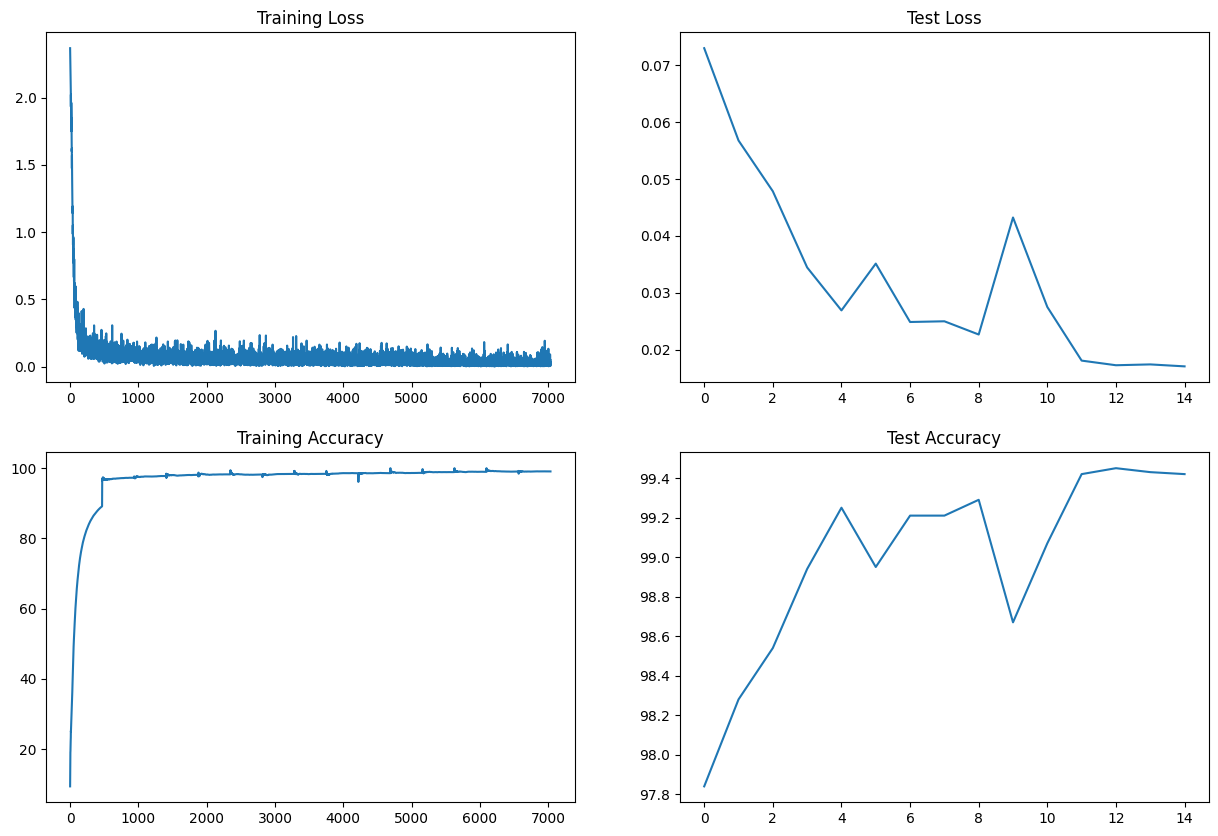

In [5]:
plot_accuracy_loss()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


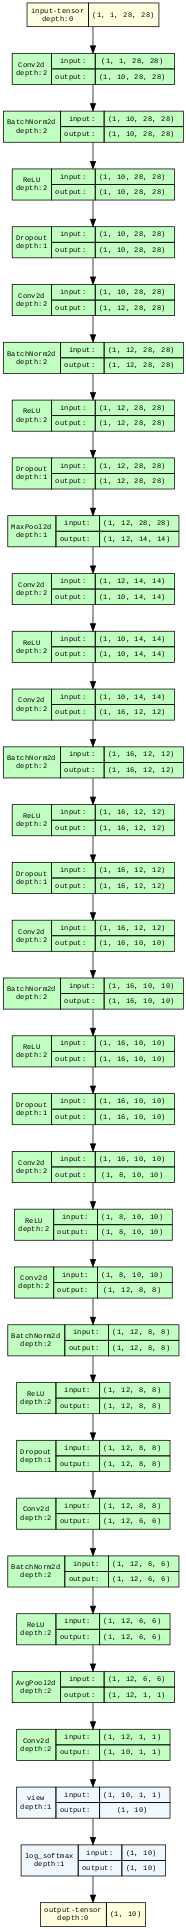

In [6]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model7(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph